<a href="https://colab.research.google.com/github/dandara-dias/bootcamp1-tpm1/blob/main/Bootcamp1_TPM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> 📦 Trabalho Prático Módulo 1📦 </h1> </center>

Uma empresa de comércio eletrônico está enfrentando problemas com a entrega de seus produtos para diferentes regiões do Brasil. A empresa deseja desenvolver um modelo de regressão linear que possa prever a quantidade de dias para entrega de acordo com o valor do frete, levando em consideração as particularidades de cada região.

Com base nos dados disponíveis, a equipe de ciência de dados da empresa precisa desenvolver um modelo que possa ser utilizado para estimar a quantidade de dias de entrega de um produto, com base no valor do frete e na região de destino. O objetivo é reduzir o tempo de entrega e melhorar a satisfação dos clientes.

O modelo de regressão linear deve levar em consideração as diferenças de influência de cada região no valor do frete e na quantidade de dias de entrega. Além disso, o modelo deve ser capaz de prever com precisão a quantidade de dias de entrega para diferentes valores de frete em cada região, permitindo que a empresa tome decisões mais precisas e assertivas sobre o gerenciamento da logística de seus produtos.


---


Para esta atividade, os alunos deverão criar um algoritmo de regressão linear
para prever a quantidade de dias para entrega de itens baseado no valor do
frete cobrado.

1. Criar um projeto no Google Colab.
2. Coletar e inserir o arquivo frete_dias_entrega.csv na plataforma.
3. Filtrar o dataset para a região sudeste.
4. Analisar os dados coletados.
5. Avaliar a relação entre as variáveis.
6. Criar algoritmo de regressão linear.
7. Responder às questões teóricas e práticas do trabalho.

---

# Importando as bibliotecas

In [ ]:
# Pandas: biblioteca utilizada para fazer manipulações de dataframes
# Plotly: biblioteca utilizada para visualização gráfica
# Seaborn: biblioteca utilizada para análises gráficas
# Numpy: biblioteca para utilizar funções matemáticas
# Sklearn.metrics: módulo da biblioteca sklearn para utilizar métricas de avaliação

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Coletando dados

In [ ]:
# Utilizando o Pandas para abrir o arquivo com os dados
custo_frete = pd.read_csv('/content/frete_dias_entrega.csv', sep=';')

# Analisando os dados coletados

In [ ]:
#visualizando arquivos da base de dados (os 5 primeiros registros)
custo_frete.head()

,Região,Valor do Frete,Dias para Entrega
0,Norte,49.59,20.0
1,Norte,117.57,3.0
2,Norte,98.15,7.0
3,Norte,96.98,6.0
4,Norte,123.00,6.0


In [ ]:
# filtrando o dataset para a região sudeste
frete_sudeste = custo_frete[custo_frete['Região'] == 'Sudeste']
frete_sudeste.head()

,Região,Valor do Frete,Dias para Entrega
200,Sudeste,106.04,8.0
201,Sudeste,103.51,1.0
202,Sudeste,82.69,13.0
203,Sudeste,108.23,4.0
204,Sudeste,116.11,1.0


In [ ]:
# gerando algumas estatísticas da base de dados
frete_sudeste.describe()
# a função describe mostra a quantidade de linhas; média; desvio padrão;
# valores mínimo e máximo; 1º e 3º quartil; mediana

,Valor do Frete,Dias para Entrega
count,100.000000,100.000000
mean,87.186500,8.120000
std,22.707019,5.733615
min,19.170000,1.000000
25%,73.017500,3.750000
50%,89.240000,7.000000
75%,106.190000,12.000000
max,119.570000,26.000000


In [ ]:
# verificando se existe algum valor nulo ou ausente, e conta quantos tem
frete_sudeste.isna().sum()

Região               0
Valor do Frete       0
Dias para Entrega    0
dtype: int64

In [ ]:
# verificando informações da base de dados (vendo o tipo das variáveis)
frete_sudeste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 200 to 299
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região             100 non-null    object 
 1   Valor do Frete     100 non-null    float64
 2   Dias para Entrega  100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


# Análise de correlação entre as variáveis


*   Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, possuem uma relação direta.
*   Correlação negativa: quando duas variáveis possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa.


In [ ]:
frete_sudeste.corr(numeric_only = True)
# no caso, a correlação é negativa

,Valor do Frete,Dias para Entrega
Valor do Frete,1.000000,-0.900648
Dias para Entrega,-0.900648,1.000000


# Análise gráfica da correlação entre as variáveis

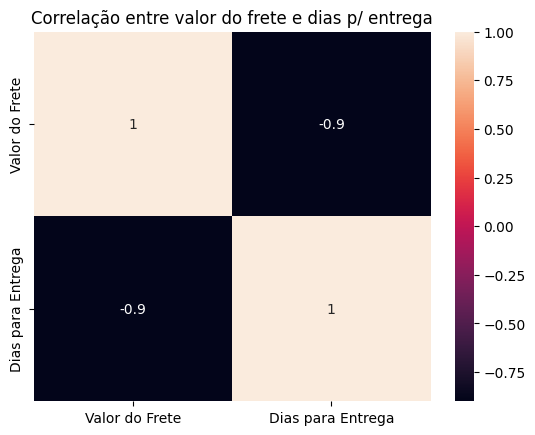

In [ ]:
correlacao = frete_sudeste.corr(numeric_only = True)
sns.heatmap(correlacao, annot=True).set(title='Correlação entre valor do frete e dias p/ entrega');
# criando um gráfico de calor para a correlação
# a variável annot serve para trazer os valores dentro do gráfico

# Tratamento de dados

Nesta etapa, vamos preparar os dados para serem utilizados no modelo de Regressão Linear. Essa transformação deve ser realizada para que os dados possam ter o formato que o algorítmo solicita como entrada.

## Criando variável independente - X

Coletamos todos os registros da primeira coluna e convertemos no formato de array

In [ ]:
# primeira coluna: valor do frete
X = frete_sudeste.iloc[:,1].values # selecionando todas as linhas da coluna 1
print(X)

[106.04 103.51  82.69 108.23 116.11 116.26  92.89 116.46 111.23  48.95
  41.5   78.98 102.68  63.54  92.67  49.36  59.45  89.51  91.84  70.88
 115.21  60.42 119.57  66.   118.7   37.7   88.29  56.9   87.75 101.31
  82.85  65.84  96.94  68.87  33.47  60.72 100.98 106.64 109.98  84.89
  76.32 100.53 117.47  86.73 115.8   69.96  98.35  84.64 118.49  94.12
  89.33  82.59 100.33 117.05  85.69  59.6  108.99  95.84 118.57  50.12
  80.26  74.58  57.69  60.26 115.93  88.84  92.82  89.15  96.69 114.66
 114.56  60.02  91.63 119.06  98.77  88.12  59.78  95.71  74.45  95.53
  87.85 109.58  19.17 107.31 107.27  93.99  83.67  73.73  84.72  75.63
  78.52  77.17  51.31  46.94 102.65  84.04 108.2   96.42 115.34  70.3 ]


A função iloc permite selecionar um conjunto de registros. O dois pontos ":" significa que estamos selecionando todos os registros e um "1" a segunda coluna (a primeira coluna é a zero "0")

## Criando variável dependente - Y (o que queremos predizer)

In [ ]:
# segunda coluna: dias para entrega
Y = frete_sudeste.iloc[:,2].values
print(Y)

[ 8.  1. 13.  4.  1.  2. 11.  1.  4. 15. 18.  7.  6. 17.  9. 20. 16.  3.
  5. 11.  2. 18.  3. 13.  1. 17.  5. 16.  7.  4. 10. 15.  5.  9. 23. 12.
  9.  7.  1.  7.  6.  4.  1.  8.  1. 13.  9.  6.  2. 11. 11. 10.  8.  1.
 13. 16.  1.  5.  4. 19. 12. 10. 13. 12.  2.  3.  4.  7.  8.  3.  1. 16.
  2.  1.  2.  5. 15.  2.  8. 11.  5.  1. 26.  4.  1. 10.  7. 10.  7. 13.
 11. 12. 16. 14.  2.  5.  4.  4.  5. 13.]


# Verificando tipo de variáveis

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
X.shape
# o comando shape mostra como estão os dados dentro da variável
# no caso, temos 100 linhas e 0 colunas
# porém o algorítmo de regressão linear não aceita esse formato de array,
# mas sim de matriz

(100,)

# Transformando array em matriz

In [ ]:
X = X.reshape(-1,1)
# pega a lista e transforma em matriz

In [ ]:
X.shape # temos 100 linhas e 1 coluna

(100, 1)

# Criando modelo de Machine Learning - Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
predicao_dias_frete = LinearRegression()

In [ ]:
type(predicao_dias_frete);

# Realizando o treinamento do modelo

In [ ]:
predicao_dias_frete.fit(X, Y);

# Calculando a constante alfa - intercept

In [ ]:
predicao_dias_frete.intercept_ # ponto de interceção com a reta

27.94772254633564

# Calculando o coeficiente angular da reta (beta) - coef

In [ ]:
predicao_dias_frete.coef_ # inclinação da reta

array([-0.22741735])

# Realizando a predição de dias para entrega

Baseado no valor do frete, vamos estimar/prever a entrega

In [ ]:
previsao_dias = predicao_dias_frete.predict(X)

In [ ]:
# visualização das previsões para cada valor de frete
previsao_dias

array([ 3.83238704,  4.40775293,  9.1425821 ,  3.33434305,  1.54229436,
        1.50818175,  6.82292516,  1.46269829,  2.65209101, 16.8156434 ,
       18.50990264,  9.98630046,  4.59650933, 13.4976243 ,  6.87295698,
       16.72240229, 14.42776125,  7.59159579,  7.06171337, 11.82838097,
        1.74696997, 14.20716643,  0.75543034, 12.93817763,  0.95328343,
       19.37408855,  7.86904496, 15.00767549,  7.99185032,  4.9080711 ,
        9.10619533, 12.9745644 ,  5.9018849 , 12.28548984, 20.33606393,
       14.13894122,  4.98311882,  3.69593664,  2.9363627 ,  8.64226394,
       10.5912306 ,  5.08545663,  1.23300676,  8.22381602,  1.61279373,
       12.03760493,  5.58122644,  8.69911827,  1.00104107,  6.54320182,
        7.63253092,  9.16532384,  5.1309401 ,  1.32852205,  8.46033006,
       14.39364865,  3.16150587,  6.15204399,  0.98284768, 16.5495651 ,
        9.69520626, 10.98693679, 14.82801578, 14.2435532 ,  1.58322948,
        7.74396542,  6.83884437,  7.67346604,  5.95873924,  1.87

# Visualizando no gráfico as disposições dos dados

Para visualizar os dados no gráfico, temos que transformar os valores das variáveis para o formato de vetor (array). Para isso utilizamos o comando ravel().

## Gerando visualização gráfica dos dados

In [ ]:
# gráfico 1
# gráfico de dispersão dos itens
import plotly.graph_objects as go
grafico_dispersao = px.scatter(x = X.ravel(), y = Y, title='Dias para entrega de acordo com o valor do frete');
fig = go.Figure(grafico_dispersao)
fig.update_layout(
    title_x=0.5,
    xaxis_title='Valor do Frete',
    yaxis_title='Dias para entrega')
fig.show()

In [ ]:
# gráfico 2
# dispersão com as previsões
import plotly.graph_objects as go
grafico_dispersao = px.scatter(x = X.ravel(), y = Y, title='Dias para entrega de acordo com o valor do frete')
grafico_dispersao.add_scatter(x = X.ravel(), y = previsao_dias, name='Previsões')
fig = go.Figure(grafico_dispersao)
fig.update_layout(
    title_x=0.5,
    xaxis_title='Valor do Frete',
    yaxis_title='Dias para entrega')
fig.show()

# Calculando a quantidade de dias de acordo com a equação linear

$y_i = \alpha + \beta * x_i + \varepsilon_i$

*   $y_i$ = previsão dos dias para entrega
*   $\alpha$ = constante
*   $\beta$ = coeficiente de inclinação da reta
*   $x_i$ = valor do frete
*   $\varepsilon_i$ = erro







In [ ]:
# verificando os valores de uma determinada previsão baseado no valor do frete
alpha = predicao_dias_frete.intercept_
beta = predicao_dias_frete.coef_
Xi = 118

alpha + beta*Xi

array([1.11247557])

# Calculando a quantidade de dias através da função predict do modelo

In [ ]:
# verificando de modo direto
predicao_dias_frete.predict([[52.98]]).round() # dois colchetes para passar como matriz
# arredondando com o round

array([16.])

# Avaliação do modelo

In [ ]:
# calculando a acurácia do modelo
predicao_dias_frete.score(X, Y)

0.8111671052762233

# Calculando o Mean Absolut Error

$ MAE = \frac{1}{n} \sum_{j=1}^{n} |Y_j - \tilde{y}_j | $

*   $ n $ = número total de registros
*   $ Y_j $ = valor real
*   $ \tilde{y}_j $ = valor previsto





In [ ]:
mean_absolute_error(Y, previsao_dias)

2.091861170350245

# Calculando o Mean Squared Error

$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \tilde{y}_i)^2 $

*   $ n $ = número total de registros
*   $ y_i $ = valor real
*   $ \tilde{y}_i $ = valor previsto





In [ ]:
MSE = mean_squared_error(Y, previsao_dias)
print(MSE)

6.145679858522149


# Calculando o Root Mean Squared Error

$ RMSE = \sqrt { \frac{1}{n} \sum_{j=1}^{n} (Y_j - \tilde{y}_j )^2 } $

*   $ n $ = número total de registros
*   $ Y_j $ = valor real
*   $ \tilde{y}_j $ = valor previsto





In [ ]:
np.sqrt(MSE)

2.479048175917957